In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.model_selection import cross_val_score, validation_curve

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn import datasets, svm
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [7]:
data = pd.read_csv("data/book_rating_train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23063 entries, 0 to 23062
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          23063 non-null  object 
 1   Authors       23063 non-null  object 
 2   PublishYear   23063 non-null  int64  
 3   PublishMonth  23063 non-null  int64  
 4   PublishDay    23063 non-null  int64  
 5   Publisher     22915 non-null  object 
 6   Language      5861 non-null   object 
 7   pagesNumber   23063 non-null  int64  
 8   Description   23063 non-null  object 
 9   rating_label  23063 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 1.8+ MB


In [15]:
data.head(10)

,Name,Authors,PublishYear,PublishMonth,PublishDay,Publisher,Language,pagesNumber,Description,rating_label
0,Best of Dr Jean: Reading & Writing,Jean R. Feldman,2005,6,1,Teaching Resources,NaN,48,Teachers will turn to this treasury of ideas a...,4.0
1,Here All Dwell Free,Gertrud Mueller Nelson,1991,10,1,DoubleDay,NaN,364,Every human being lives a fairy tale -- an unc...,4.0
2,Boomer's Big Surprise,Constance W. McGeorge,2005,3,31,Chronicle Books,NaN,32,<i>Boomer's Big Surprise</i> will have special...,4.0
3,"I'll Go and Do More: Annie Dodge Wauneka, Nava...",Carolyn Niethammer,2004,9,1,Bison Books,NaN,293,<i>I'll Go and Do More</i> is the story of Ann...,4.0
4,Us,Richard Mason,2005,7,7,Penguin Books Ltd,eng,352,"Since their days at Oxford, they've gone their...",3.0
5,Castles of Britain and Ireland: The Ultimate R...,Peter Somerset Fry,1996,12,31,David & Charles,NaN,336,A completely revised edition of a classic book...,4.0
6,Cities of Ladies: Beguine Communities in the M...,Walter Simons,2003,2,27,University of Pennsylvania Press,NaN,352,Selected by <i>Choice</i> magazine as an Outst...,4.0
7,Tangi,Witi Ihimaera,1990,12,1,Heinemann Educational Books,NaN,204,"Tangi is a poetic drama in prose, about a youn...",4.0
8,Crystal The Snow Fairy (Rainbow Magic #8; Weat...,Daisy Meadows,2006,3,1,Scholastic Paperbacks,eng,80,The Weather Fairies have lost their magical fe...,4.0
9,The Road to Al-Qaeda: The Story of Bin Laden's...,Montasser Al-Zayyat,2004,3,20,Pluto Press,NaN,144,<i>The Road to Al-Qaeda</i> is a controversial...,3.0


# Data preprocessing and brief knowledge about the data

In [8]:
data.isnull().sum()
data["Name"].str.lower()
data["Description"].str.lower()


0        teachers will turn to this treasury of ideas a...
1        every human being lives a fairy tale -- an unc...
2        <i>boomer's big surprise</i> will have special...
3        <i>i'll go and do more</i> is the story of ann...
4        since their days at oxford, they've gone their...
                               ...                        
23058    "if i lose the light of the sun, i will write ...
23059    trudy ederle loved to swim, and she was determ...
23060    bronislaw malinowski achieved international re...
23061    lovers of housman's poetry and admirers of his...
23062    before the accident, peter spent every weekend...
Name: Description, Length: 23063, dtype: object

In [9]:
pd.value_counts(data["Language"], normalize=True)

/var/folders/m_/mxy49jcn79z64fb2527q3vhh0000gn/T/ipykernel_84060/1547544841.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data["Language"], normalize=True)


Language
eng    0.929875
fre    0.026275
spa    0.025422
ger    0.010067
jpn    0.001365
per    0.001365
mul    0.001194
por    0.000853
lat    0.000682
ita    0.000682
zho    0.000512
grc    0.000341
heb    0.000341
rus    0.000341
ara    0.000171
swe    0.000171
frs    0.000171
nld    0.000171
Name: proportion, dtype: float64

In [16]:
pd.value_counts(data["rating_label"], normalize=True)

/var/folders/m_/mxy49jcn79z64fb2527q3vhh0000gn/T/ipykernel_84060/4155227866.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data["rating_label"], normalize=True)


rating_label
4.0    0.702771
3.0    0.254260
5.0    0.042969
Name: proportion, dtype: float64

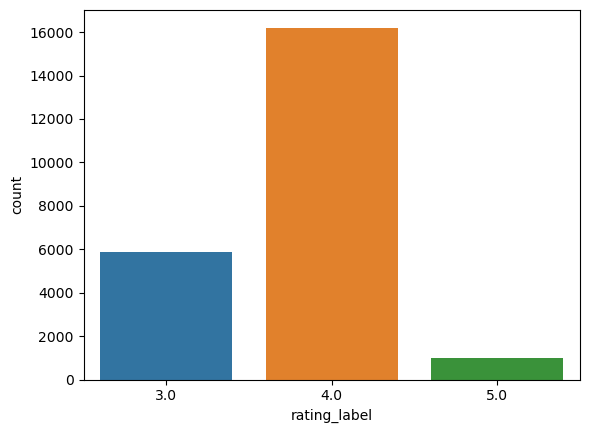

In [18]:
sns.countplot(x = "rating_label", data = data)
plt.show()

<Axes: xlabel='rating_label', ylabel='count'>

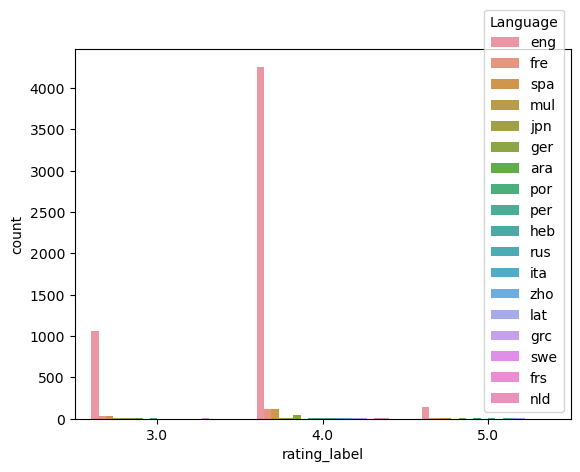

In [19]:
sns.countplot(x="rating_label", data = data, hue = "Language")

In [20]:
data[['Authors', 'Publisher','Language']] = data[['Authors', 'Publisher','Language']].apply(lambda x: pd.factorize(x)[0])

# heatmap of Pearson Correlation

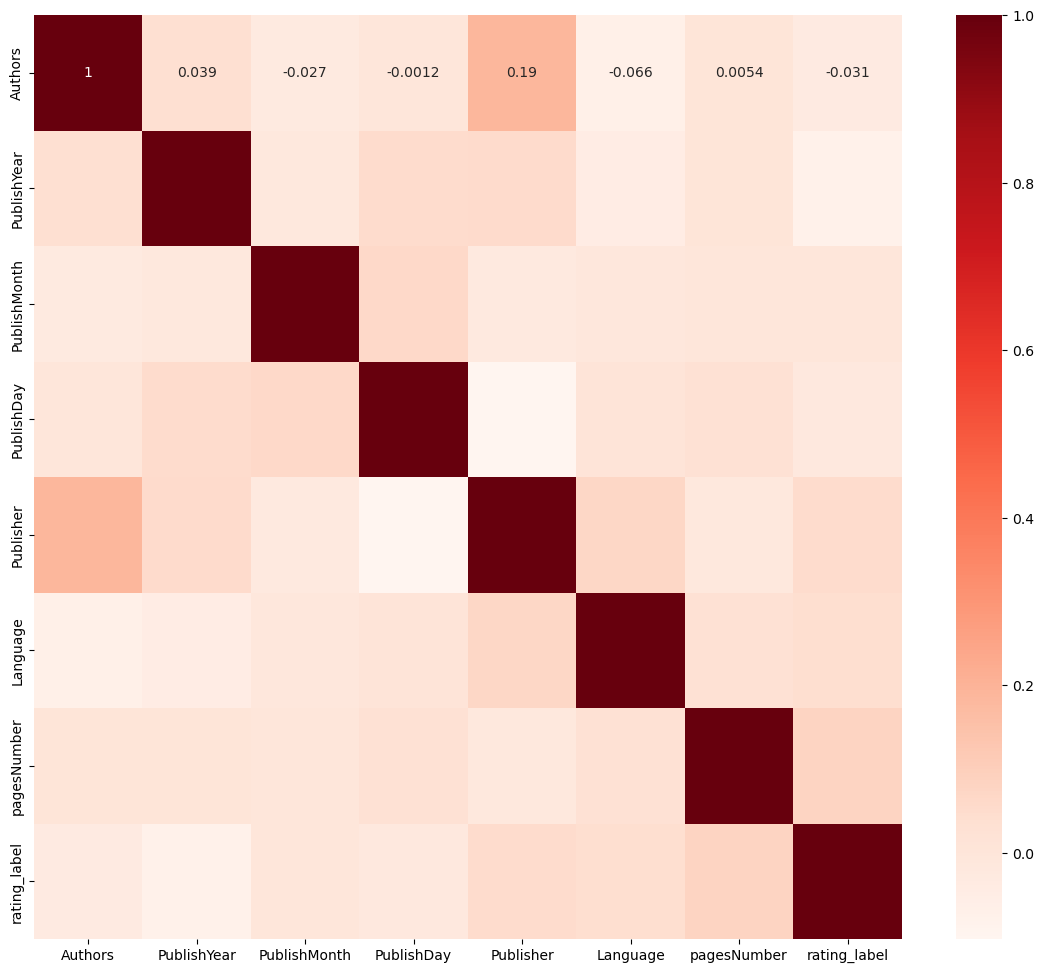

In [23]:
#Using Pearson Correlation

numeric_data = data.select_dtypes(include=['float64', 'int64'])
cor = numeric_data.corr()

plt.figure(figsize=(14,12))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Potential relationship between page numbers and rating label

In [24]:
data.groupby(['rating_label'])['pagesNumber'].describe()

,count,mean,std,min,25%,50%,75%,max
rating_label,,,,,,,,
3.0,5864.0,254.738915,144.615051,0.0,171.0,246.5,320.0,1632.0
4.0,16208.0,283.761229,234.131308,0.0,164.0,256.0,361.0,9999.0
5.0,991.0,427.088799,1238.882386,0.0,148.5,264.0,443.0,37000.0


<Axes: title={'center': 'pagesNumber'}, xlabel='rating_label'>

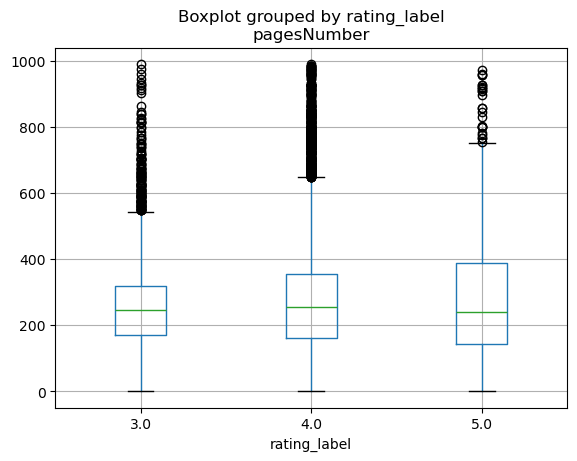

In [25]:
data.loc[
    data['pagesNumber'] < data['pagesNumber'].quantile(0.99)
].boxplot(column='pagesNumber', by = 'rating_label')

# feature selection

In [26]:
y = data["rating_label"]
X = data.drop(columns = "rating_label")
features = X
class_label = y
ALPHA = 0.05

In [27]:
filtered_features = []

for feature in (X.columns):
    cont_table = pd.crosstab(class_label, features[feature])
    chi2_val, p, dof, expected = stats.chi2_contingency(cont_table.values, correction=False)
    
    print(f'Chi2 value for feature "{feature}": {chi2_val:.4f}')
    
    if(p < ALPHA): 
        filtered_features.append(feature)
        print(f'Reject the Null Hypothesis for feature "{feature}", p-value {p:.4f}\n')
    else:
        print(f'Fail to reject the Null Hypothesis for feature "{feature}", p-value {p:.4f}\n')
        
print('Feature set after filtering with Chi-square test:', filtered_features)

Chi2 value for feature "Name": 46082.5589
Fail to reject the Null Hypothesis for feature "Name", p-value 0.1964

Chi2 value for feature "Authors": 40118.6955
Reject the Null Hypothesis for feature "Authors", p-value 0.0000

Chi2 value for feature "PublishYear": 496.9845
Reject the Null Hypothesis for feature "PublishYear", p-value 0.0000

Chi2 value for feature "PublishMonth": 53.1956
Reject the Null Hypothesis for feature "PublishMonth", p-value 0.0002

Chi2 value for feature "PublishDay": 99.7878
Reject the Null Hypothesis for feature "PublishDay", p-value 0.0010

Chi2 value for feature "Publisher": 14831.2173
Reject the Null Hypothesis for feature "Publisher", p-value 0.0000

Chi2 value for feature "Language": 281.6078
Reject the Null Hypothesis for feature "Language", p-value 0.0000

Chi2 value for feature "pagesNumber": 4044.5022
Reject the Null Hypothesis for feature "pagesNumber", p-value 0.0000

Chi2 value for feature "Description": 45720.2122
Fail to reject the Null Hypothesis

# CountVec

In [28]:
x_train, x_dev, y_train, y_dev = train_test_split(
    data.drop(columns='rating_label'), data['rating_label'], test_size = 0.1, random_state = 42
)
x_train.shape, x_dev.shape, y_train.shape, y_dev.shape

((20756, 9), (2307, 9), (20756,), (2307,))

In [29]:
cv = CountVectorizer(
    stop_words = 'english'
).fit(x_train['Description'])

In [30]:
cv.vocabulary

In [31]:
train_cv = cv.transform(x_train['Description'])
dev_cv = cv.transform(x_dev['Description'])
train_cv.shape, dev_cv.shape

((20756, 88380), (2307, 88380))

# Multinomial Naive Bayes

In [32]:
mnb = MultinomialNB()
mnb.fit(train_cv, y_train)

MultinomialNB()

In [33]:
mnb.score(train_cv, y_train), mnb.score(dev_cv, y_dev)

(0.8543553671227597, 0.7000433463372345)

# Error Analysis

In [34]:
print(classification_report(y_dev,mnb.predict(dev_cv)))

              precision    recall  f1-score   support

         3.0       0.48      0.27      0.35       569
         4.0       0.74      0.90      0.81      1623
         5.0       0.33      0.03      0.05       115

    accuracy                           0.70      2307
   macro avg       0.52      0.40      0.40      2307
weighted avg       0.65      0.70      0.66      2307



<Axes: >

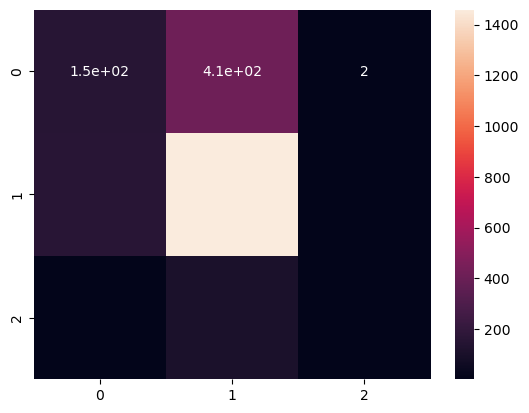

In [35]:
sns.heatmap(confusion_matrix(y_dev, mnb.predict(dev_cv)), annot=True)

# top20 important words in Description

In [36]:
kbest = SelectKBest(score_func=mutual_info_classif, k=40000).fit(train_cv, y_train)

In [38]:
top20 = kbest.scores_.argsort()[::-1][:20]
np.array(cv.get_feature_names_out())[top20]

array(['bible', 'br', 'god', 'novel', 'volume', 'spiritual',
       'photographs', 'internet', 'translation', 'poems', 'work',
       'poetry', 'web', 'published', 'art', 'divine', 'reference',
       'prayer', 'study', 'book'], dtype=object)

# doc2vec


In [41]:
x_doc2vec = pd.read_csv('data/book_text_features_doc2vec/train_desc_doc2vec100.csv', header = None)
x_doc2vec.shape

(23063, 100)

In [42]:
y = data['rating_label']

# Logistic Regression

In [43]:
lr = LogisticRegression(max_iter = 1000).fit(x_doc2vec, y)

In [44]:
cross_val_score(lr, x_doc2vec, y).mean()

0.7015567547424799

# Linear SVM with parameter tuning

In [46]:
param_range = np.logspace(-5,1,10) # 10 points from 1e-2 to 1e2

train_scores, validation_scores = validation_curve(
    LinearSVC(max_iter=1000), x_doc2vec, data['rating_label'], 
    param_name='C', param_range=param_range, cv = 5, n_jobs = -1, verbose=0
)

/Users/robin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/robin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/robin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/robin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/robin/anaconda3/l

In [47]:
mean_train_scores = np.mean(train_scores, axis = 1)
std_train_scores = np.std(train_scores, axis = 1)
mean_valid_scores = np.mean(validation_scores, axis = 1)
std_valid_scores = np.std(validation_scores, axis = 1)

In [48]:
std_train_scores, std_valid_scores

(array([7.89199475e-06, 9.24571510e-05, 4.79721530e-04, 8.03732523e-04,
        7.02852419e-04, 8.32655852e-04, 8.54306676e-04, 8.76708344e-04,
        1.11439448e-03, 1.53325399e-02]),
 array([3.15696904e-05, 2.26964452e-04, 1.03297329e-03, 1.68575596e-03,
        1.53475261e-03, 1.46759993e-03, 1.36304700e-03, 1.44642993e-03,
        2.17338338e-03, 1.56926266e-02]))

In [49]:
mean_train_scores.mean(), mean_valid_scores.mean()

(0.7011653059542898, 0.7002080576988483)

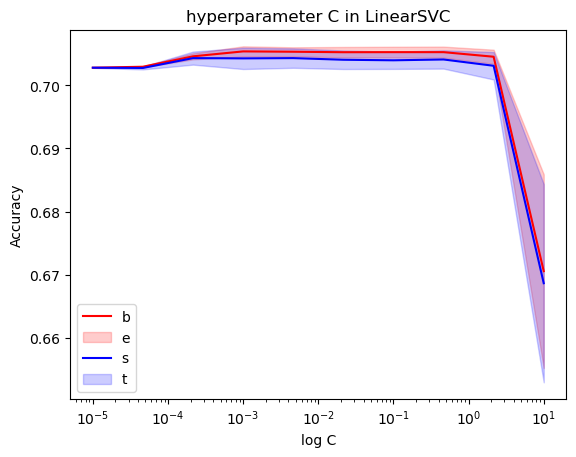

In [53]:
# C = 10e-4 highest C > 1, performence decrease
plt.semilogx(param_range, mean_train_scores, label="training scores", color = 'r')
plt.fill_between(param_range, mean_train_scores - std_train_scores, mean_train_scores + std_train_scores, alpha = 0.2, color = "r")
plt.semilogx(param_range, mean_valid_scores, label = "cross validation score", color = 'b')
plt.fill_between(param_range, mean_valid_scores - std_valid_scores, mean_valid_scores + std_valid_scores, alpha = 0.2, color = "b")

plt.legend("best")

plt.title("hyperparameter C in LinearSVC")
plt.xlabel("log C")
plt.ylabel("Accuracy")
plt.show()

# KNN

In [54]:
X_fs=X[filtered_features]
X_fs

,Authors,PublishYear,PublishMonth,PublishDay,Publisher,Language,pagesNumber
0,0,2005,6,1,0,-1,48
1,1,1991,10,1,1,-1,364
2,2,2005,3,31,2,-1,32
3,3,2004,9,1,3,-1,293
4,4,2005,7,7,4,0,352
...,...,...,...,...,...,...,...
23058,16300,1997,8,1,4245,0,120
23059,1250,2005,6,1,47,-1,32
23060,14077,1989,2,15,298,-1,132
23061,8284,1998,4,21,4246,-1,136


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_fs, y, test_size=0.1, random_state=1)

In [56]:
knn = KNeighborsClassifier(n_neighbors=100)

# Fit to the train dataset
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [57]:
y_pred_knn = knn.predict(X_test)

accuracy = knn.score(X_test, y_test)
print('Accuracy', accuracy)

Accuracy 0.6970091027308193
